In [1]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
from TorchRL_MAC_utils import default_cfg, train, evaluate, evaluate_with_comparison

## 1. Configure Training

Using small settings for quick demonstration. For better results, increase `num_iters` to 500-1000.

In [2]:
# Create configuration
cfg = default_cfg()

# --- CRITICAL FOR PPO STABILITY ---
# PPO needs more data per update. 
# 128 steps * 4 envs = 512 total samples per update (Minimum for stable PPO)
cfg.rollout_len = 16        
cfg.num_envs = 4

# PPO Hyperparameters 
cfg.ppo_epochs = 4           
cfg.clip_param = 0.2         
cfg.entropy_coef = 0.01      

# Training run
cfg.num_iters = 5000         
cfg.lr = 3e-4
cfg.hidden_dim = 128         
cfg.log_interval = 10        

# Evaluation settings
cfg.eval_episodes = 200       
# cfg.eval_interval = 200     

print("Configuration:")
print(f"  Training iterations: {cfg.num_iters}")
print(f"  Batch size (steps * envs): {cfg.rollout_len * cfg.num_envs}")
print(f"  Learning rate: {cfg.lr}")


Configuration:
  Training iterations: 5000
  Batch size (steps * envs): 64
  Learning rate: 0.0003


## 2. Train Policy

Train separate actor networks for each agent with a centralized critic.

In [3]:
# Train
print("Starting training...\n")
checkpoint_path, stats = train(cfg)

print(f"\n✓ Training complete!")
print(f"  Checkpoint: {checkpoint_path}")
print(f"  Final loss: {stats['losses'][-1]:.3f}")
print(f"  Final return: {stats['returns'][-1]:.3f}")
print(f"  Final entropy: {stats['entropies'][-1]:.3f}")

Starting training...

Starting training with config:
MacConfig(env_name='simple_reference', num_envs=4, max_cycles=25, continuous_actions=False, hidden_dim=128, actor_layers=2, critic_layers=2, num_iters=5000, rollout_len=16, lr=0.0003, gamma=0.99, entropy_coef=0.01, value_coef=0.5, max_grad_norm=0.5, eval_episodes=200, success_threshold=-150.0, seed=42, device='cpu', checkpoint_dir='./checkpoints', log_interval=10)


/opt/anaconda3/envs/hw-env/lib/python3.11/site-packages/pygame/pkgdata.py:25: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_stream, resource_exists
/opt/anaconda3/envs/hw-env/lib/python3.11/site-packages/torchrl/envs/libs/pettingzoo.py:1018: UserWarning: PettingZoo failed to load all modules with error message No module named 'multi_agent_ale_py', trying to load individual modules.
  warnings.warn(
/opt/anaconda3/envs/hw-env/lib/python3.11/site-packages/torchrl/envs/libs/pettingzoo.py:51: UserWarning: SISL environments failed to load with error message No module named 'Box2D'.
  warnings.warn(f"SISL environments failed to load with error message {err}.")
/opt/anaconda3/envs/hw-env/lib/python3.11/site-packages/torchrl/envs/libs/pettingzoo.py:57: UserWarning:

Iter 10/5000 | Loss: 452.146 | Return: -27.358 | Entropy: 7.823
Iter 20/5000 | Loss: 444.646 | Return: -27.151 | Entropy: 7.823
Iter 30/5000 | Loss: 534.215 | Return: -30.421 | Entropy: 7.823
Iter 40/5000 | Loss: 459.636 | Return: -28.391 | Entropy: 7.823
Iter 50/5000 | Loss: 422.996 | Return: -27.168 | Entropy: 7.822
Iter 60/5000 | Loss: 436.339 | Return: -27.131 | Entropy: 7.822
Iter 70/5000 | Loss: 507.695 | Return: -30.887 | Entropy: 7.822
Iter 80/5000 | Loss: 418.497 | Return: -28.183 | Entropy: 7.822
Iter 90/5000 | Loss: 484.733 | Return: -29.893 | Entropy: 7.822
Iter 100/5000 | Loss: 417.525 | Return: -28.505 | Entropy: 7.822
Iter 110/5000 | Loss: 410.104 | Return: -27.719 | Entropy: 7.822
Iter 120/5000 | Loss: 589.894 | Return: -34.145 | Entropy: 7.823
Iter 130/5000 | Loss: 398.725 | Return: -28.605 | Entropy: 7.823
Iter 140/5000 | Loss: 424.285 | Return: -29.750 | Entropy: 7.823
Iter 150/5000 | Loss: 463.214 | Return: -31.739 | Entropy: 7.823
Iter 160/5000 | Loss: 519.143 | Re

## 3. Plot Training Progress

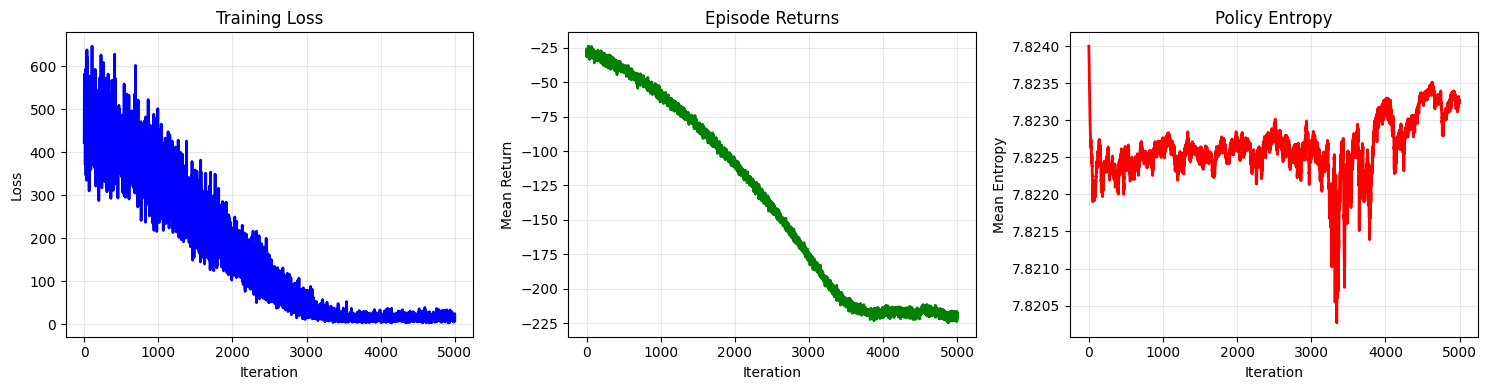

Training curves saved to: mac_training_curves.png


In [4]:
# Plot training curves
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Loss
axes[0].plot(stats['losses'], 'b-', linewidth=2)
axes[0].set_xlabel('Iteration')
axes[0].set_ylabel('Loss')
axes[0].set_title('Training Loss')
axes[0].grid(True, alpha=0.3)

# Returns
axes[1].plot(stats['returns'], 'g-', linewidth=2)
axes[1].set_xlabel('Iteration')
axes[1].set_ylabel('Mean Return')
axes[1].set_title('Episode Returns')
axes[1].grid(True, alpha=0.3)

# Entropy
axes[2].plot(stats['entropies'], 'r-', linewidth=2)
axes[2].set_xlabel('Iteration')
axes[2].set_ylabel('Mean Entropy')
axes[2].set_title('Policy Entropy')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('mac_training_curves.png', dpi=100, bbox_inches='tight')
plt.show()

print("Training curves saved to: mac_training_curves.png")

## 4. Evaluate: Normal Mode (With Communication)

In [5]:
# Evaluate with communication
print("Evaluating with communication...\n")
metrics_normal = evaluate(cfg, checkpoint_path, mode="normal")

print("\nNormal Mode Results:")
print(f"  Success Rate: {metrics_normal['success_rate']:.3f}")
print(f"  Communication Cost: {metrics_normal['comm_cost']:.4f}")

Evaluating with communication...


Evaluating in mode: normal
  Success Rate: 1.000
  Comm Cost: 0.9788
  Positive Score: 46.992

Normal Mode Results:
  Success Rate: 1.000
  Communication Cost: 0.9788


## 5. Evaluate: No-Communication Mode (Speaker Silenced)

In [6]:
# Evaluate without communication
print("Evaluating without communication (speaker silenced)...\n")
metrics_no_comm = evaluate(cfg, checkpoint_path, mode="no_comm")

print("\nNo-Communication Mode Results:")
print(f"  Success Rate: {metrics_no_comm['success_rate']:.3f}")
print(f"  Communication Cost: {metrics_no_comm['comm_cost']:.4f} (should be ~0)")

Evaluating without communication (speaker silenced)...


Evaluating in mode: no_comm
  Success Rate: 1.000
  Comm Cost: 0.0000
  Positive Score: 41.876

No-Communication Mode Results:
  Success Rate: 1.000
  Communication Cost: 0.0000 (should be ~0)


## 6. Compare and Compute Communication Efficiency

In [7]:
# Run full comparison
print("Running full comparison...\n")
metrics = evaluate_with_comparison(cfg, checkpoint_path)

print("\n" + "="*50)
print("FINAL METRICS")
print("="*50)
print(f"Success Rate (with comm):    {metrics['success_rate']:.3f}")
print(f"Success Rate (no comm):      {metrics['success_rate_no_comm']:.3f}")
print(f"Communication Cost:          {metrics['comm_cost']:.4f}")
print(f"Communication Gain:          {metrics['comm_gain']:.3f}")
print(f"Communication Efficiency:    {metrics['comm_efficiency']:.3f}")
print("="*50)

Running full comparison...


Evaluating in mode: normal
  Success Rate: 1.000
  Comm Cost: 0.9788
  Positive Score: 46.992

Evaluating in mode: no_comm
  Success Rate: 1.000
  Comm Cost: 0.0000
  Positive Score: 41.876

=== Final Metrics ===
Success Rate (normal): 1.000
Success Rate (no_comm): 1.000
Comm Cost: 0.9788
Comm Gain: 0.000
Comm Efficiency: 0.000

FINAL METRICS
Success Rate (with comm):    1.000
Success Rate (no comm):      1.000
Communication Cost:          0.9788
Communication Gain:          0.000
Communication Efficiency:    0.000


## 7. Interpretation

### Metrics Explanation:

- **Success Rate (with comm)**: How often the listener reaches the correct landmark when the speaker can communicate
- **Success Rate (no comm)**: How often the listener succeeds without any speaker signals (baseline)
- **Communication Cost**: Average "expense" of speaker actions (0 = no communication, higher = more communication)
- **Communication Gain**: Improvement from communication (= success_with_comm - success_no_comm)
- **Communication Efficiency**: How much success per unit of communication (= gain / cost)

### Good results show:
1. Higher success rate with communication than without
2. Positive communication gain
3. High communication efficiency (agents learned to use minimal but informative signals)

### Notes:
- With only 10 training iterations, the policy is undertrained
- For meaningful results, train for 500-1000 iterations
- Increase `eval_episodes` to 100+ for stable metrics

In [8]:
# Summary table
print("\nMetrics Summary:")
print("-" * 60)
print(f"{'Metric':<30} {'Value':<15} {'Interpretation'}")
print("-" * 60)
print(f"{'Success (with comm)':<30} {metrics['success_rate']:<15.3f} {'Higher is better'}")
print(f"{'Success (no comm)':<30} {metrics['success_rate_no_comm']:<15.3f} {'Baseline performance'}")
print(f"{'Communication Cost':<30} {metrics['comm_cost']:<15.4f} {'Lower is better'}")
print("-" * 60)


Metrics Summary:
------------------------------------------------------------
Metric                         Value           Interpretation
------------------------------------------------------------
Success (with comm)            1.000           Higher is better
Success (no comm)              1.000           Baseline performance
Communication Cost             0.9788          Lower is better
------------------------------------------------------------


## Next Steps

To improve results:
1. Increase `cfg.num_iters` to 500-1000
2. Tune hyperparameters (`lr`, `gamma`, `entropy_coef`)
3. Increase `cfg.eval_episodes` to 100 for stable metrics
4. Try different network architectures (`hidden_dim`, `actor_layers`)
5. Experiment with reward shaping or curriculum learning